In [1]:
#Importing libraries 
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
dataset = pd.read_csv('sales.txt', delimiter= ';')

In [3]:
dataset.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81426 entries, 0 to 81425
Data columns (total 9 columns):
country          81426 non-null object
article          81426 non-null object
sales            81426 non-null int64
regular_price    81426 non-null float64
current_price    81426 non-null float64
ratio            81426 non-null float64
retailweek       81426 non-null object
promo1           81426 non-null int64
promo2           81426 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 5.6+ MB


In [5]:
dataset['retailweek'].nunique()

123

In [6]:
dataset_unique_week = pd.DataFrame(data= dataset.groupby('retailweek').sum())
dataset_unique_week.reset_index(inplace=True)

In [7]:
ds = dataset_unique_week['retailweek']
y = dataset_unique_week['sales']
d = {'ds': ds, 'y': y }
df = pd.DataFrame(data = d)

In [8]:
df.head()

,ds,y
0,2014-12-28,67578
1,2015-01-04,24676
2,2015-01-11,26929
3,2015-01-18,20912
4,2015-01-25,22109


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
ds    123 non-null object
y     123 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,2014-12-28,67578
1,2015-01-04,24676
2,2015-01-11,26929
3,2015-01-18,20912
4,2015-01-25,22109


In [12]:
df['ds'].max()

Timestamp('2017-04-30 00:00:00')

In [13]:
df['ds'].min()

Timestamp('2014-12-28 00:00:00')

In [14]:
df['ds']

0     2014-12-28
1     2015-01-04
2     2015-01-11
3     2015-01-18
4     2015-01-25
5     2015-02-01
6     2015-02-08
7     2015-02-15
8     2015-02-22
9     2015-03-01
10    2015-03-08
11    2015-03-15
12    2015-03-22
13    2015-03-29
14    2015-04-05
15    2015-04-12
16    2015-04-19
17    2015-04-26
18    2015-05-03
19    2015-05-10
20    2015-05-17
21    2015-05-24
22    2015-05-31
23    2015-06-07
24    2015-06-14
25    2015-06-21
26    2015-06-28
27    2015-07-05
28    2015-07-12
29    2015-07-19
         ...    
93    2016-10-09
94    2016-10-16
95    2016-10-23
96    2016-10-30
97    2016-11-06
98    2016-11-13
99    2016-11-20
100   2016-11-27
101   2016-12-04
102   2016-12-11
103   2016-12-18
104   2016-12-25
105   2017-01-01
106   2017-01-08
107   2017-01-15
108   2017-01-22
109   2017-01-29
110   2017-02-05
111   2017-02-12
112   2017-02-19
113   2017-02-26
114   2017-03-05
115   2017-03-12
116   2017-03-19
117   2017-03-26
118   2017-04-02
119   2017-04-09
120   2017-04-

In [15]:
len(df.loc[df['ds']<'2017-1-01'])

105

In [16]:
len(df.loc[df['ds']>'2017-1-01'])

17

In [17]:
train = df.loc[df['ds']<'2017-1-01']
test = df.loc[df['ds']>'2017-1-01']

In [18]:
m = Prophet(weekly_seasonality= True)
m.fit(train)
future = m.make_future_dataframe(periods=18,freq='W')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
118,2017-04-02,67982.872185,24148.075387,61543.990815,67982.855055,67982.889583,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,0.0,0.0,0.0,43497.515904
119,2017-04-09,68056.510828,25276.067745,63283.693452,68056.491491,68056.530084,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,0.0,0.0,0.0,43571.154547
120,2017-04-16,68130.149471,26446.287443,61885.810585,68130.127801,68130.171030,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,0.0,0.0,0.0,43644.793190
121,2017-04-23,68203.788115,25514.957777,62164.032788,68203.764263,68203.812067,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,0.0,0.0,0.0,43718.431834
122,2017-04-30,68277.426758,25342.053380,64037.022283,68277.401221,68277.453045,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,-24485.356281,0.0,0.0,0.0,43792.070477


In [20]:
test.tail()

,ds,y
118,2017-04-02,47338
119,2017-04-09,54087
120,2017-04-16,52133
121,2017-04-23,48610
122,2017-04-30,54715


TypeError: float() argument must be a string or a number, not 'Period'

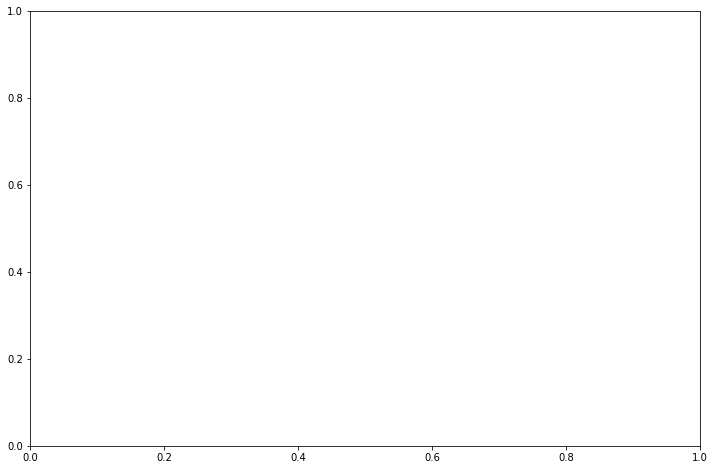

In [21]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2017-01-01','2017-4-30'))

In [22]:
from statsmodels.tools.eval_measures import rmse

In [27]:
predictions = forecast.iloc[-17:]['yhat']

In [28]:
predictions

106    42613.852183
107    42687.490826
108    42761.129470
109    42834.768113
110    42908.406756
111    42982.045400
112    43055.684043
113    43129.322687
114    43202.961330
115    43276.599973
116    43350.238617
117    43423.877260
118    43497.515904
119    43571.154547
120    43644.793190
121    43718.431834
122    43792.070477
Name: yhat, dtype: float64

In [29]:
test['y']

106    23685
107    24471
108    20426
109    20791
110    18640
111    19967
112    21631
113    25107
114    27700
115    34324
116    37801
117    43678
118    47338
119    54087
120    52133
121    48610
122    54715
Name: y, dtype: int64

In [30]:
rmse(predictions,test['y'])

15847.371423346558

In [43]:
test.mean()

y    33829.647059
dtype: float64

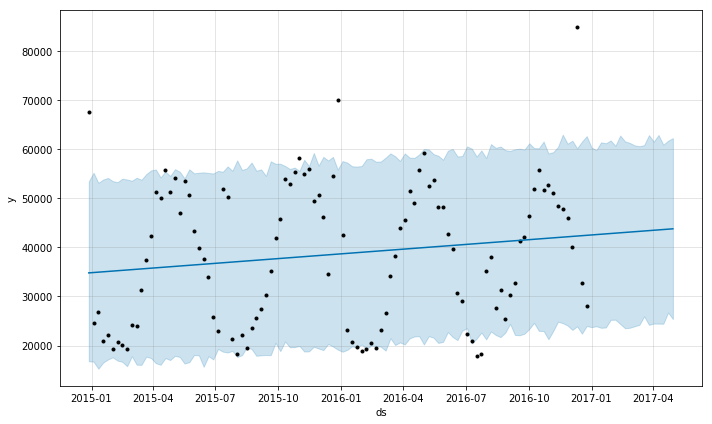

In [45]:
m.plot(forecast);